In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [17]:
# display all columns
pd.set_option('display.max_columns', None)

In [15]:
# see what we imported (data is a dictionary)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

---

<h2 align="center" >Statistics </h2>

---

In [18]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

In [14]:
# shape of the data
df.shape

(569, 31)

In [19]:
# summary statistics for every column
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.111500       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error  area error  smoothness error  compactness error  \
count       569.000000  569.000000        569.000000         569.000000   
mean          2.866059   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894              0.011796        0.020542   
std           0.030186              0.006170        0.008266   
min           0.000000              0.000000        0.007882   
25%           0.015090              0.007638        0.015160   
50%           0.025890              0.010930        0.018730   
75%           0.042050              0.014710        0.023480   
max           0.396000              0.052790        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               569.000000    569.000000     569.000000       569.000000   
mean                  0.003795     16.269190      25.677223       107.261213   
std                   0.002646      4.833242       6.146258        33.602542   
min                   0.000895      7.930000      12.020000        50.410000   
25%                   0.002248     13.010000      21.080000        84.110000   
50%                   0.003187     14.970000      25.410000        97.660000   
75%                   0.004558     18.790000      29.720000       125.400000   
max                   0.029840     36.040000      49.540000       251.200000   

        worst area  wor

In [21]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [22]:
# we see the distribution of the target variable
df.groupby('target').size()

target
0    212
1    357
dtype: int64

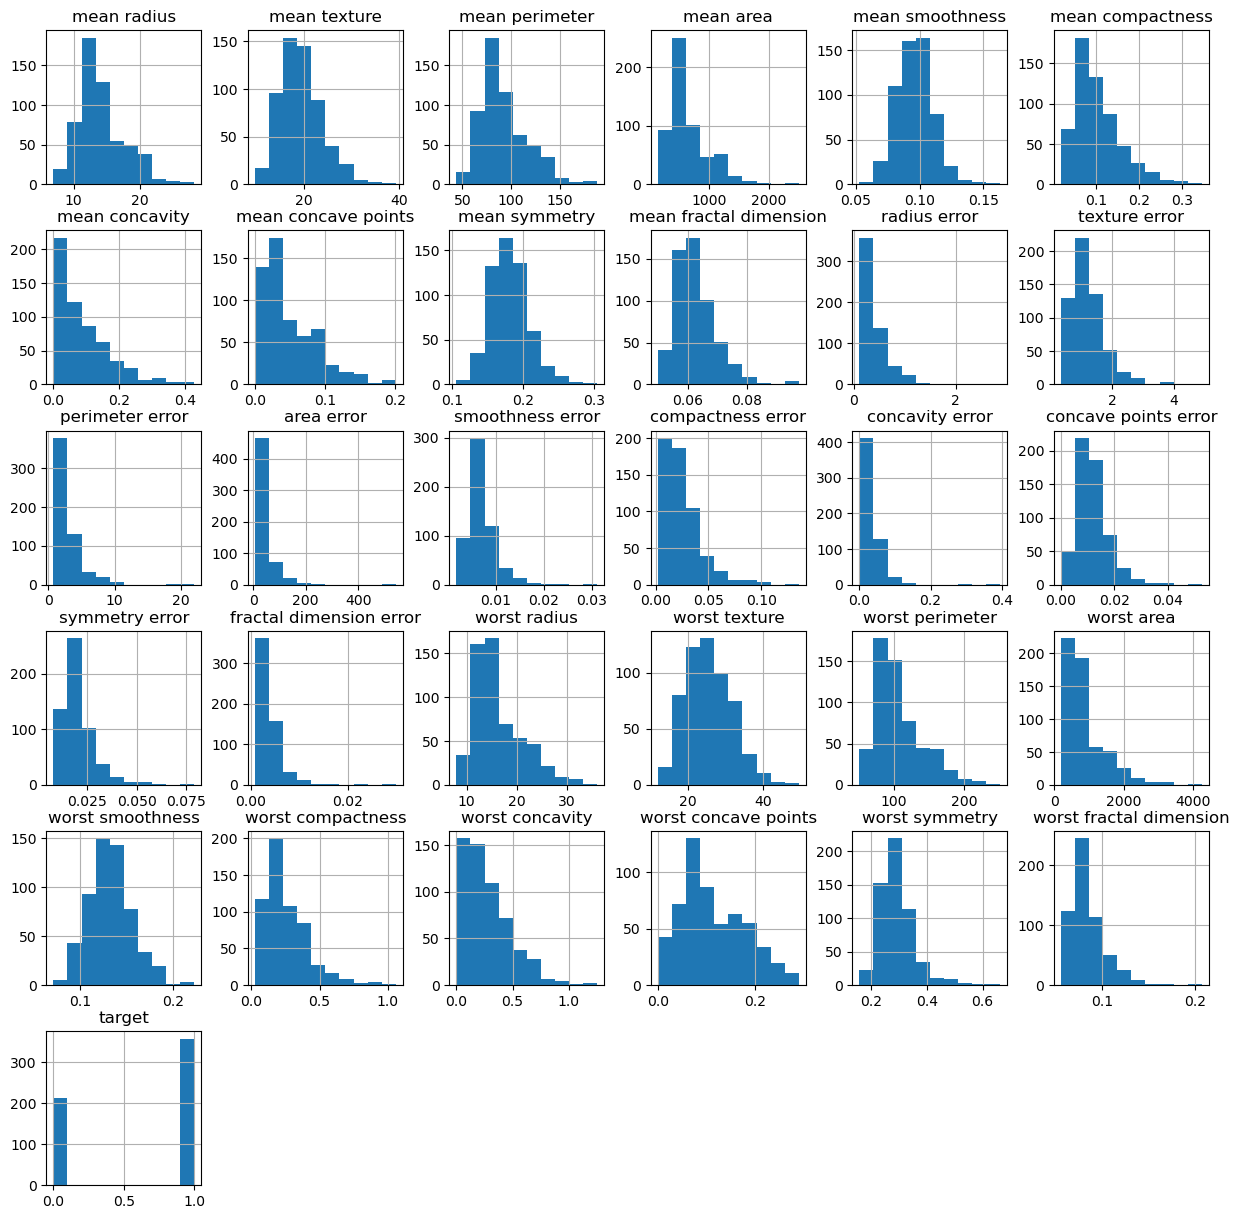

In [39]:
# the distribution of the columns of the dataframe
df.hist(layout=(6, 6), figsize=(15, 15))
plt.show()

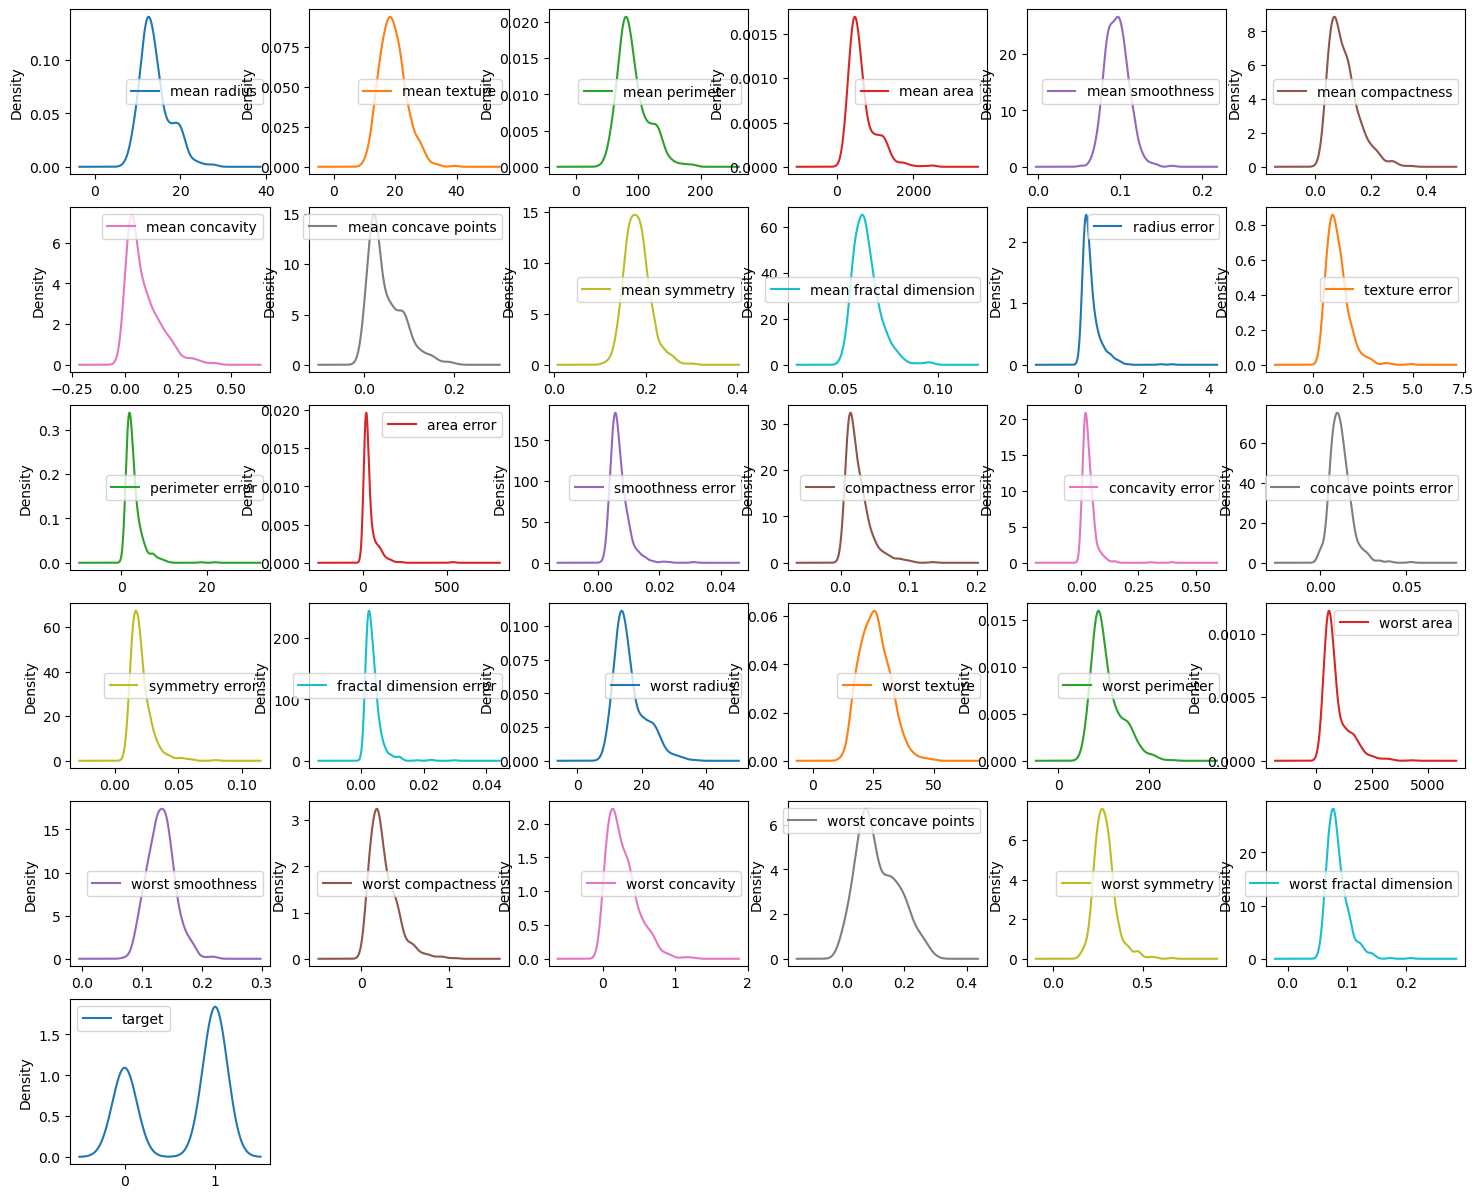

In [44]:
df.plot(kind='density', subplots=True, layout=(6,6), figsize=[18,15], sharex=False)
plt.show()

The density plot doesn't provide more meaningful insights than the histogram, so I will use a box plot to identify outliers in each column.

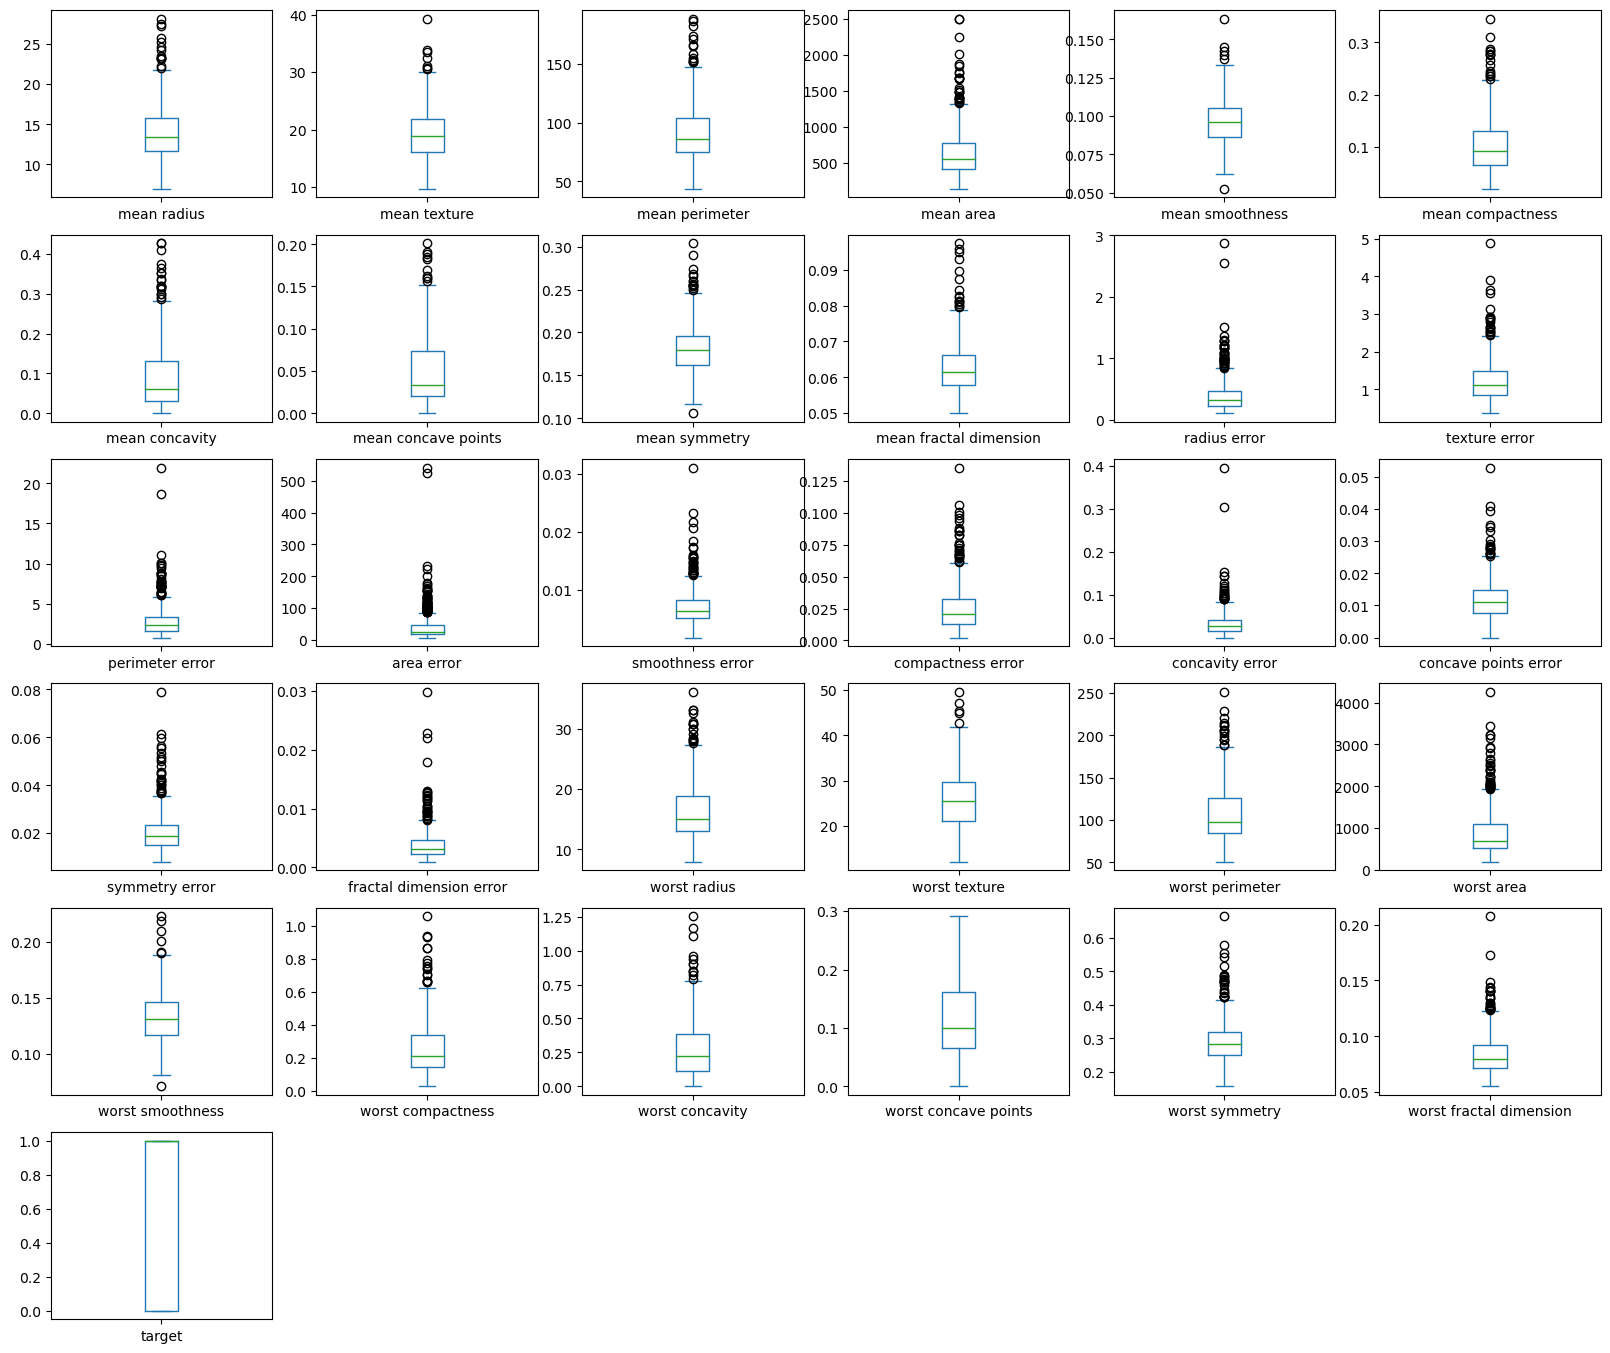

In [49]:
df.plot(kind='box', subplots=True, layout=(6,6),figsize=[20,17], sharex=False, sharey=False)
plt.show()

/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: >

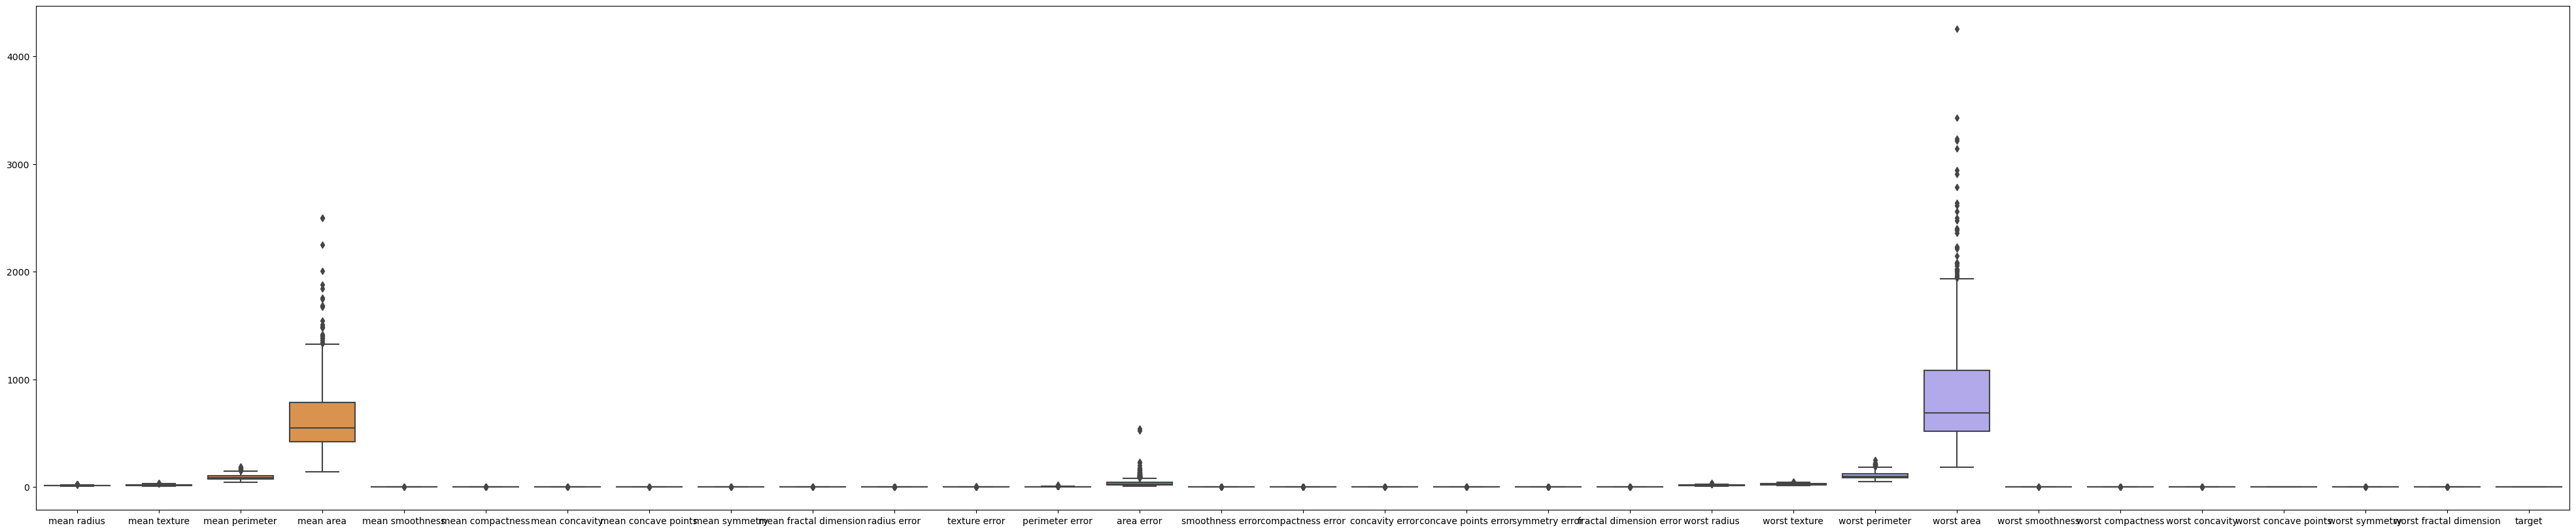

In [57]:
# ploting all the columns against each other
plt.figure(figsize=(50,10))
sns.boxplot(data=df)

/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: >

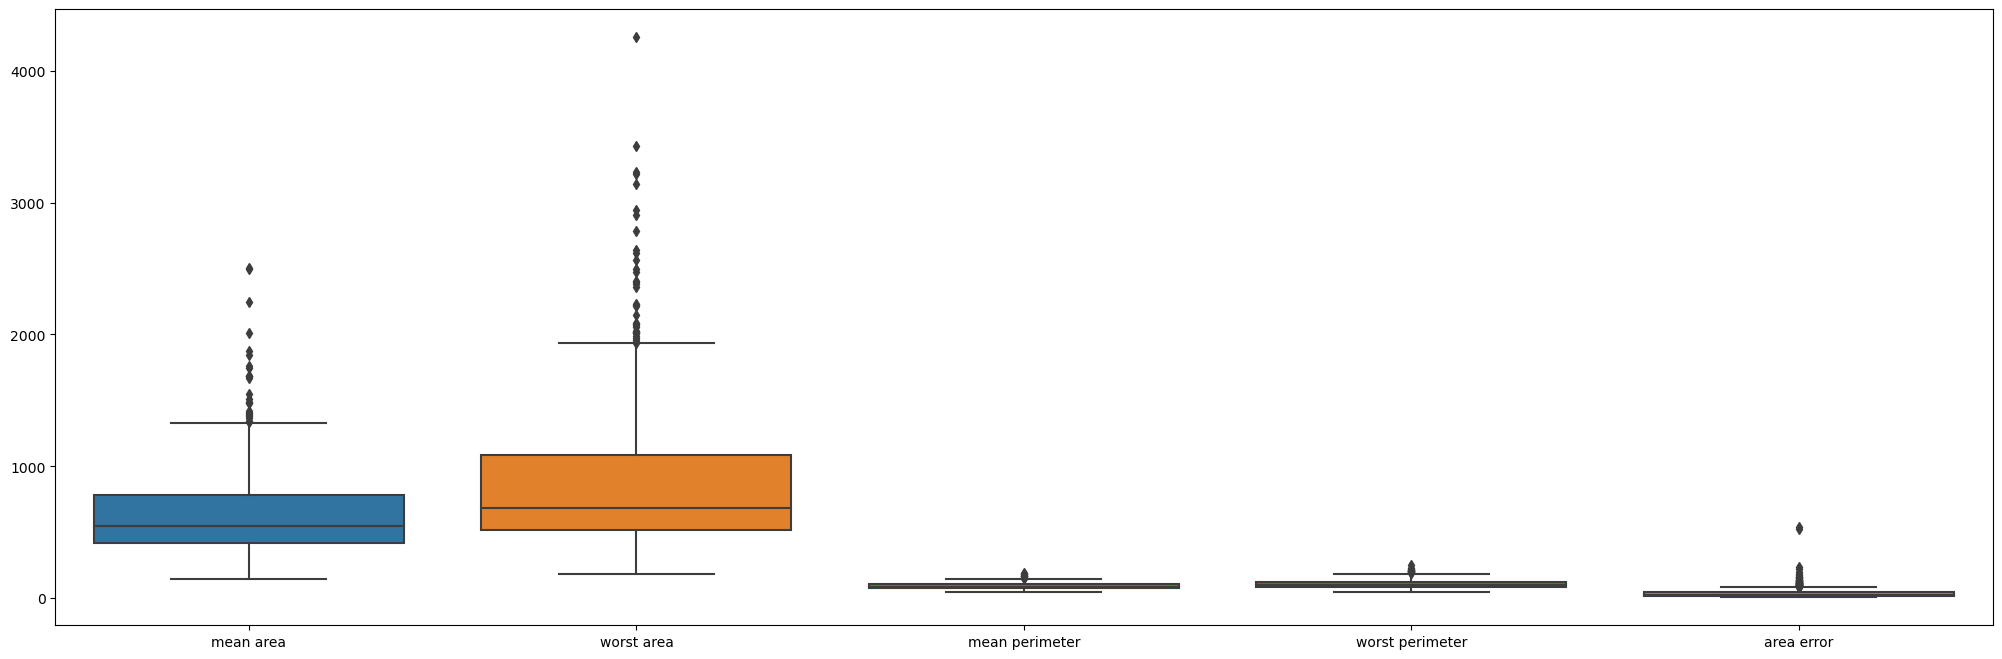

In [73]:
# ploting the 5 columns with the highest values
tmp_df = df[['mean area', 'worst area', 'mean perimeter', 'worst perimeter', 'area error']]
plt.figure(figsize=(25,8))
sns.boxplot(data=tmp_df)


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: >

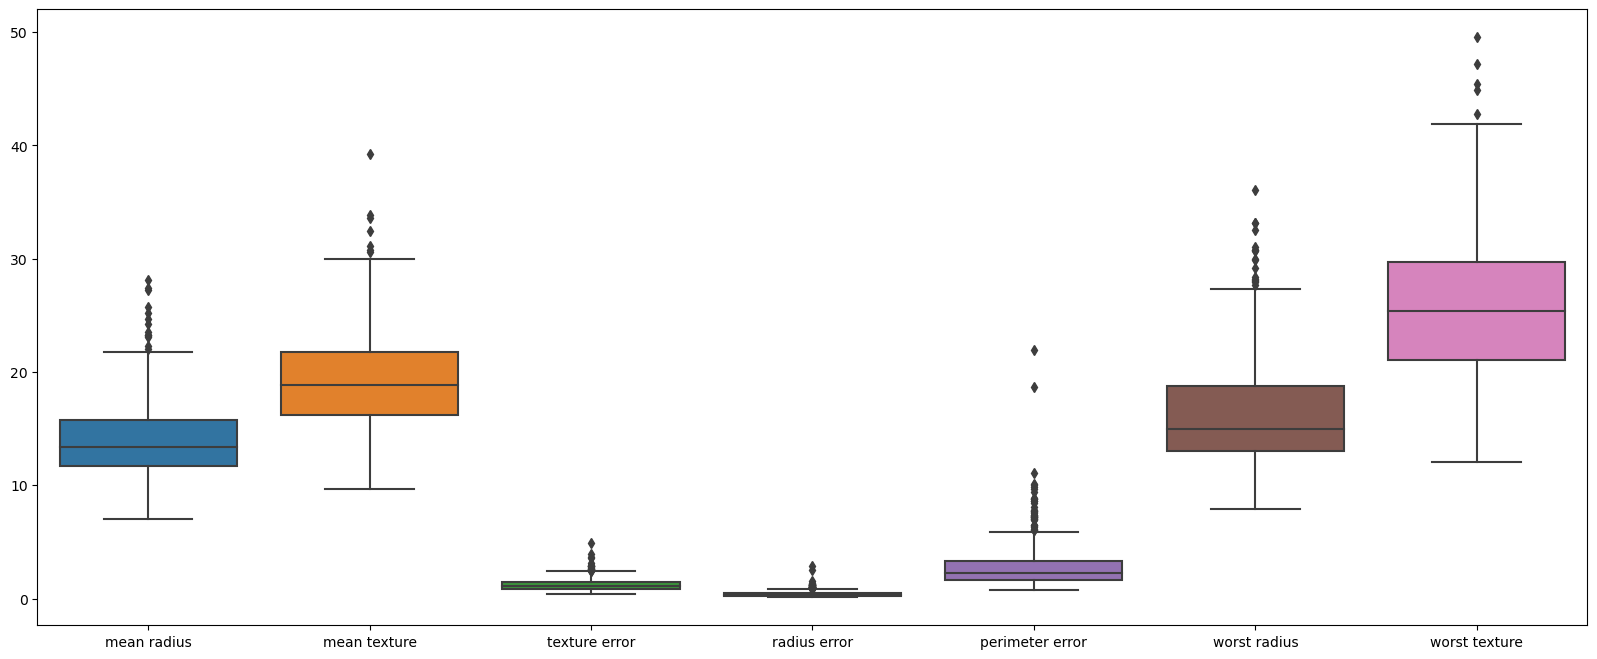

In [71]:
# ploting the rest 18 columns
tmp_df_2 = df[['mean radius', 'mean texture','texture error','radius error' , 'perimeter error', 'worst radius', 'worst texture']]
plt.figure(figsize=(20,8))
sns.boxplot(data=tmp_df_2)

We can see that for 18 of 30 columns are having values less than 40, so this implies that if i use the other collumns i will need to reguralize.

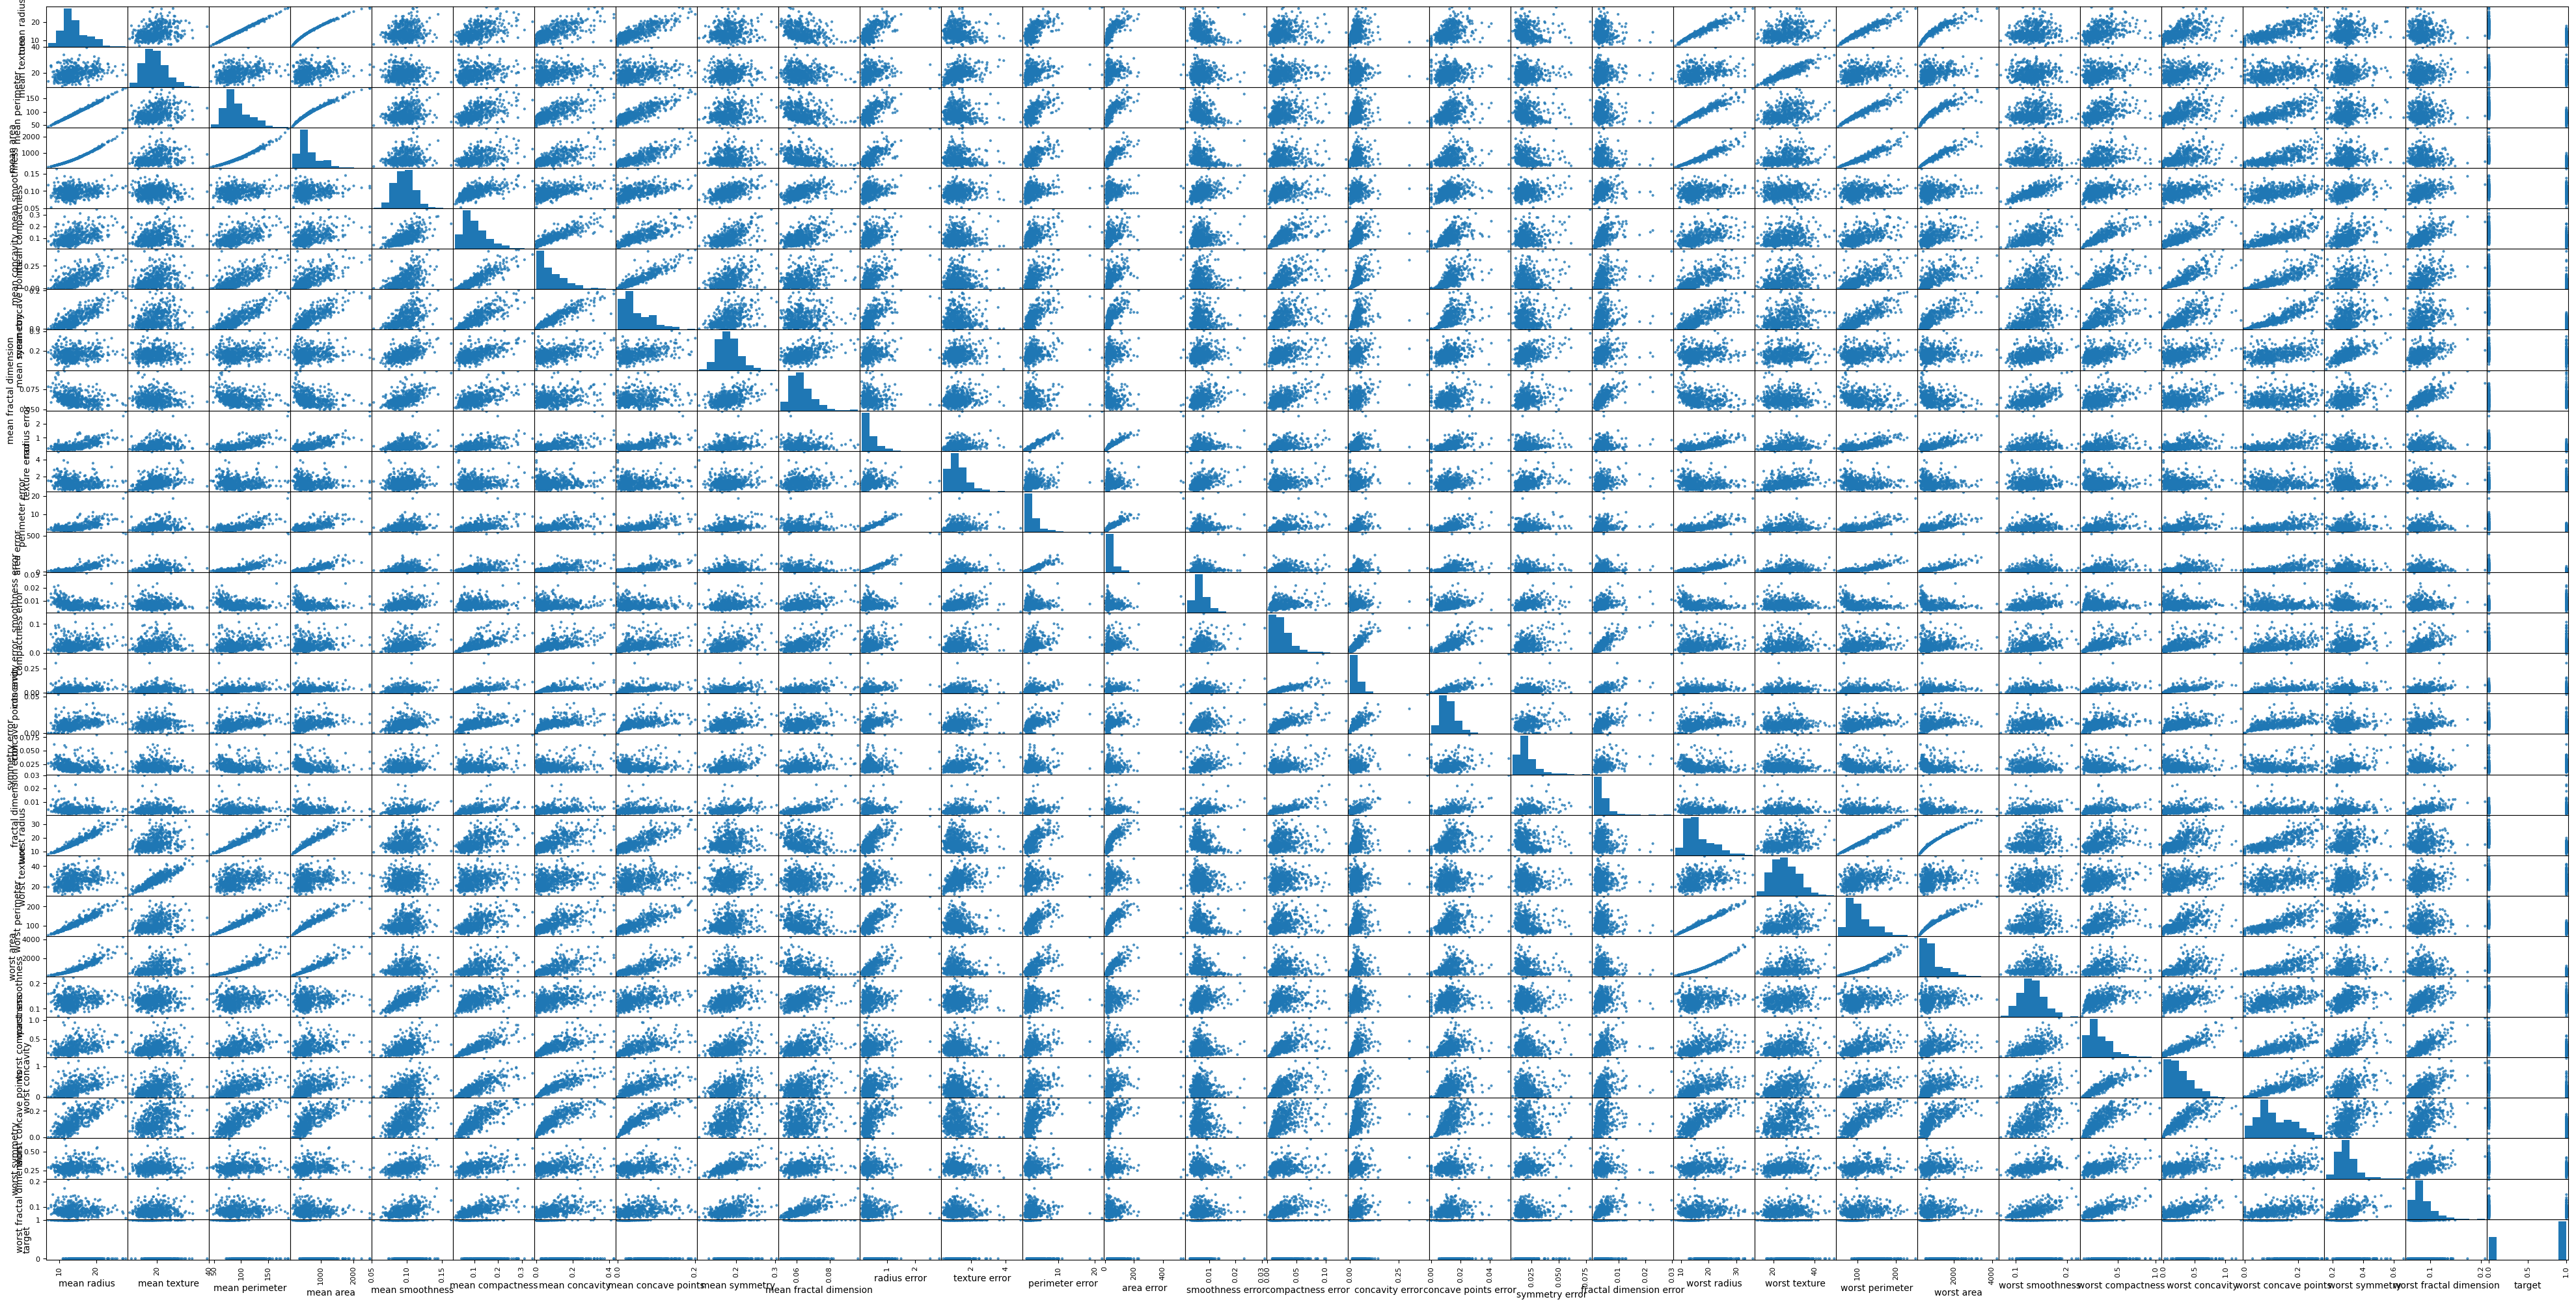

In [80]:
scatter_matrix(df, alpha=0.8, diagonal='hist', figsize=(50, 25))
plt.show()

We see that there are some features who show a correlation, we will investigate further with a heat map

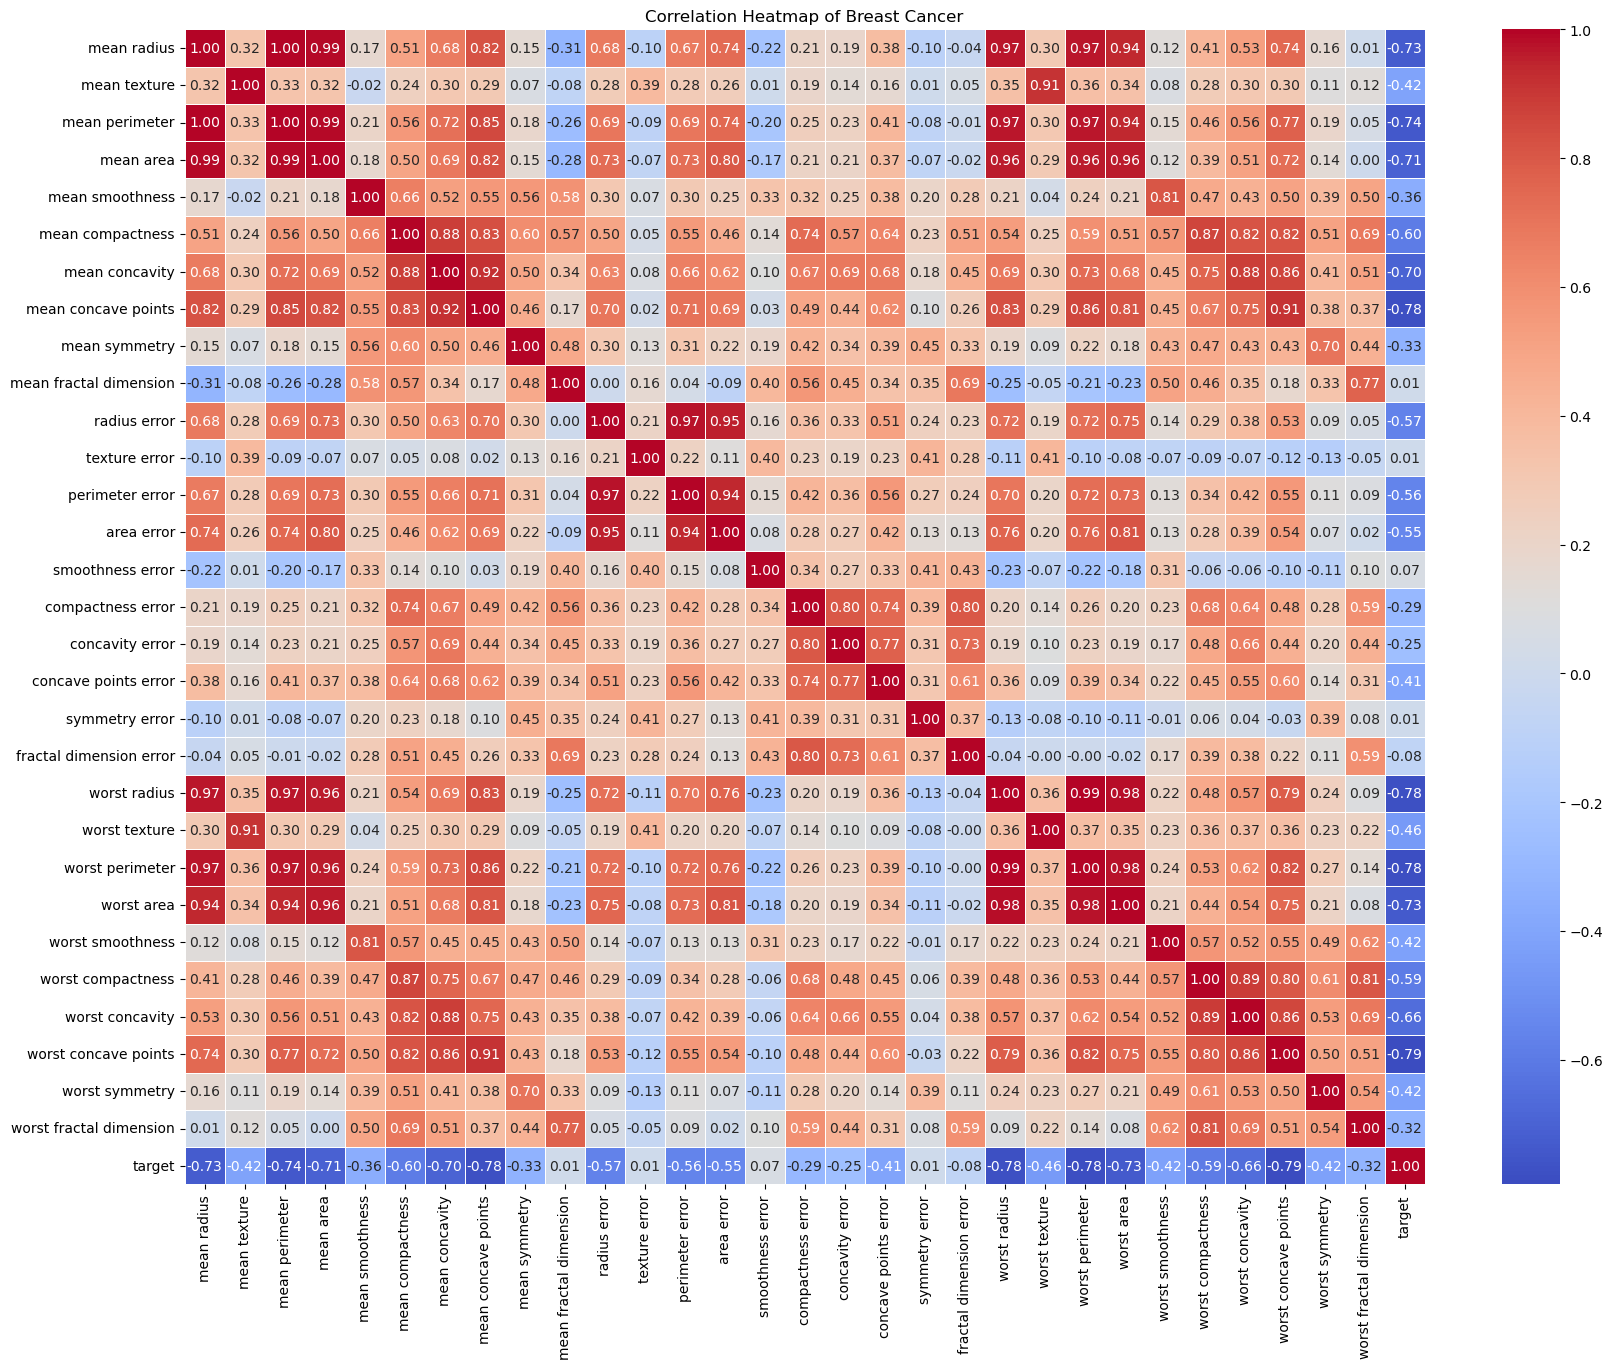

In [51]:
# see the correlation between the variables wiht a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(method= 'pearson'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Breast Cancer')
plt.show()

Before we continue with the classifier section we have to preprosece the data, for example we may drop the high corelated columns, or even reguralize the data